# Capstone Project — The Battle of Neighbourhoods

<b>Introduction:</b>

New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

<b>Questions that can be asked using the above mentioned datasets</b>
<li>What is best location in New Delhi City for Chinese Cuisine?
<li>Which areas have large number of Chinese Resturant Market?
<li>Which all areas have less number of resturant?
<li>Which is the best place to stay if I prefer Chinese Cuisine?
<li>What places are have best restaurant in New Delhi?

<b>Data</b>
<li>For this project we need the following data :
<li>New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
<li>Data source : <a href"https://www.kaggle.com/shrutimehta/zomato-restuarant-data"> Zomato kaggle dataset </a>
<li>Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
<li>Nearby places in each locality of new delhi city.
<li>Data source : <a href"https://developer.foursquare.com/"> Fousquare API </a>
<li>Description : By using this api we will get all the venues in each neighborhood.

<b>Approach</b>
<li>Collect the new delhi city data from <a href"https://www.kaggle.com/shrutimehta/zomato-restuarant-data"> Zomato kaggle dataset </a>
<li>Using FourSquare API we will find all venues for each neighborhood.
<li>Filter out all venues that are nearby by locality.
<li>Using aggregative rating for each resturant to find the best places.
<li>Visualize the Ranking of neighborhoods using folium library(python)

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following NEW packages will be INSTALLED:

    altair:          4.1.0-py_1        conda-forge
    branca:          0.4.1-py_0        conda-forge
    folium:          0.5.0-py_0        conda-forge
    python_abi:      3.6-1_cp36m       conda-forge
    vincent:         0.4.4-py_1        conda-forge

The following packages will be UPDATED:

    certifi:         2020.6.20-py36_0              --> 2020.6.20-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1g-h7b6447c_0             --> 1.1.1g-h516909a_1        conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2020.6.24-0                   --> 2020.6.20-hecda079_0     conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


<b>RESTUARANT DATA</b>

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

<b>DATA CLEANING</b>

<em>remove the unwanted columns and rows from dataset</em>

In [6]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [7]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

<b>MAP OF RESTUARANT CLUSTERS</b>

In [9]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [10]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        0  
2        0  
3        0  
4        0  
5        0

<b>BEST RATED RESTUARANTS: </b>

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

<Figure size 900x500 with 1 Axes>

<b>WORST RATED RESTUARANTS: </b>

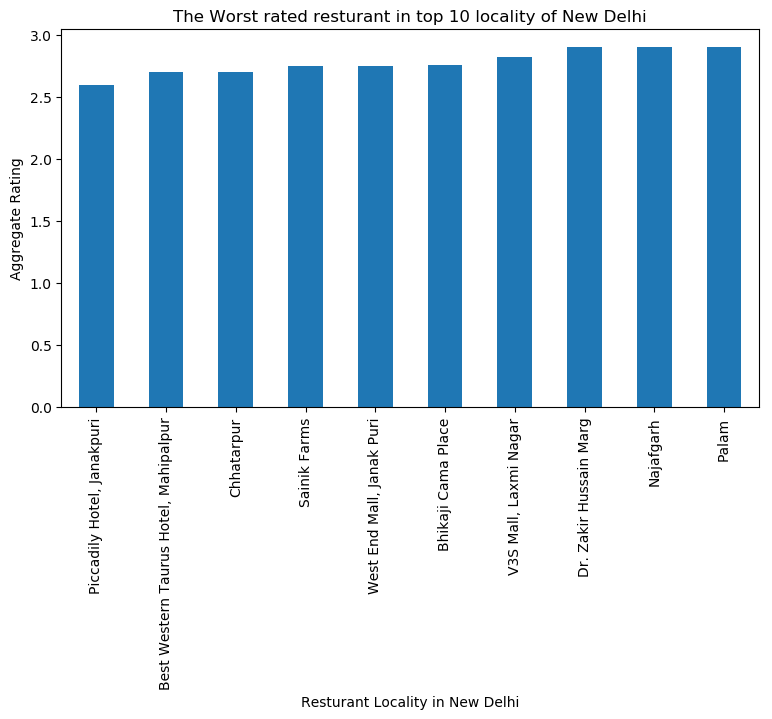

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

<b>HIGH RESTUARANT AVAILIBILITY</b>

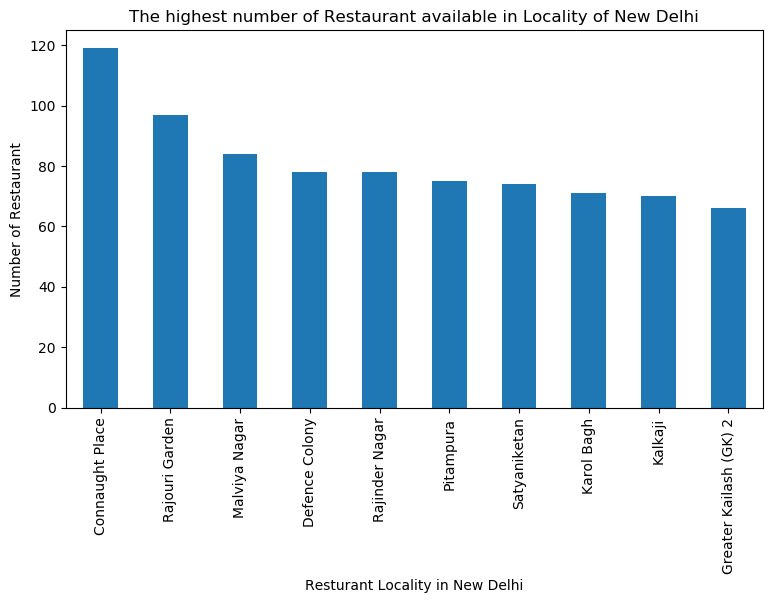

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>LOWEST AVAILIBILITY</b>

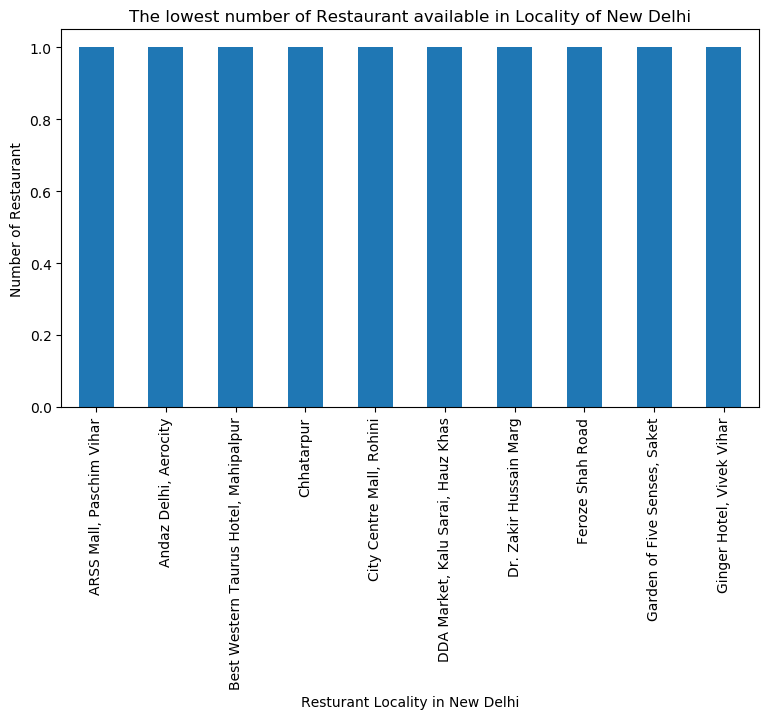

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>BEST LOCALITY FOR CHINESE FOOD</b>

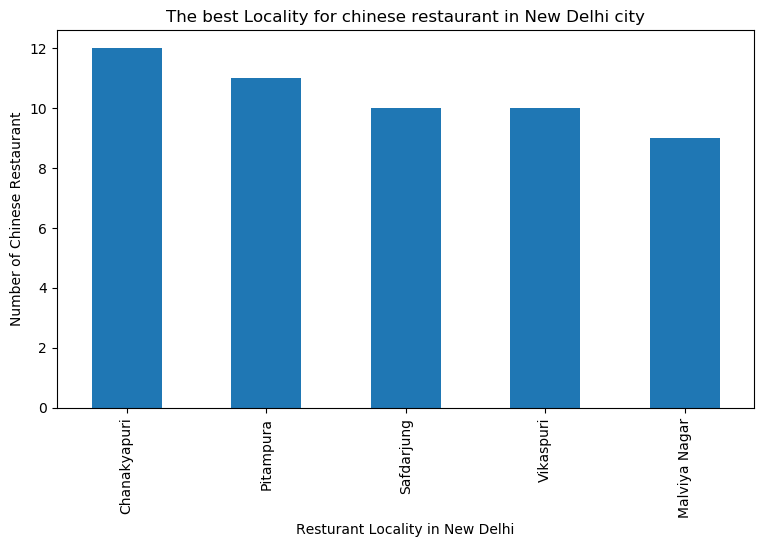

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()


<b>BEST PLACE FOR CHINESE FOOD</b>

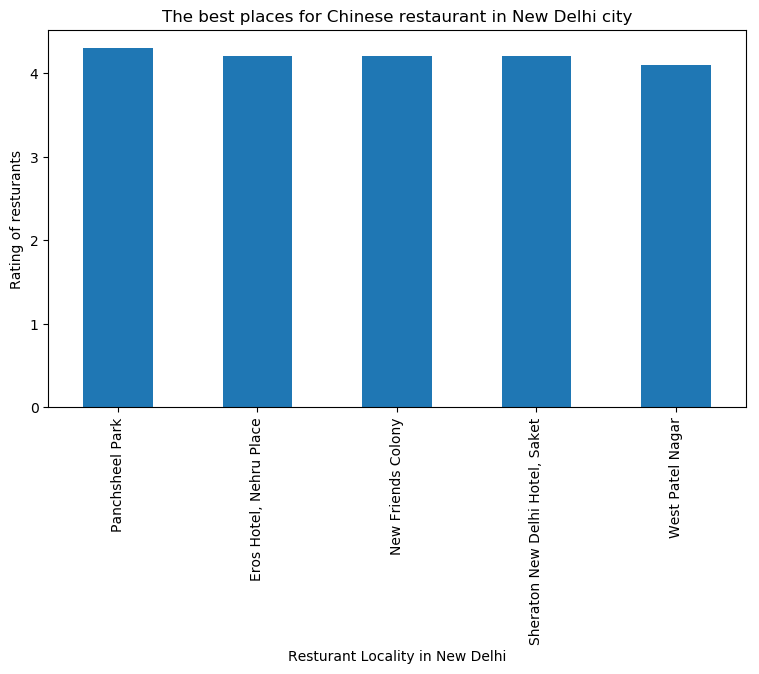

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b>DATA TRANSFORMATION</b>

Based on Locality grouping the data

In [17]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [18]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [19]:
df_final.shape

(240, 8)

<b>DEFINE FOURSQUARE CREDENTIALS AND VERSION</b>

In [20]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


<b>Create a function to repeat the same process to all the Locality in New Delhi</b>

In [21]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<b>Find the venues in all New Delhi Locality</b>

In [22]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [23]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [24]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         5   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     8   
Alaknanda                                                       5   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          24   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   5   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             2   
Barakhamba Road                                                15   
Basant Lok Market, Vasant Vihar                                28   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                           8   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    5   
Chander Nagar                                                   3   
Chandni Chowk                                                  19   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               6   
City Centre Mall, Rohini                                        9   
City Square Mall, Rajouri Garden                               22   
Civil Lines                                                     5   
...                                                           ...   
The Leela Ambience Convention Hotel                             5   
The Leela Palace, Chanakyapuri                                 12   
The Lodhi, Lodhi Road                                          13   
The Park, Connaught Place                                      28   
The Suryaa New Delhi, New Friends Colony                       21   
The Taj Mahal Hotel, Mansingh Road                              6   
The Taj Palace Hotel, Chanakyapuri                             34   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 14   
Tilak Nagar                                                     6   
Tughlakabad Institutional Area                                  6   
Uday Park                                                       7   
Unity One Mall, Janakpuri                                       7   
Uttam Nagar                                                     4   
V3S Mall, Laxmi Nagar                                          16   
Vasant Kunj                                                     7   
Vasant Square Mall, Vasant Kunj                                 9   
Vasant Vihar                                                   28   
Vasundhara Enclave                                              2   
Vijay Nagar                                                    15   
Vikas Marg                                                      4   
Vikaspuri                                                       4   
Vivek Vihar                                                     7   
Wazirpur                                                        1   
West End Mall, Janak Puri                                      15   
West Gate Mall, Rajouri Garden                

In [25]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 204 uniques categories.


In [26]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  African Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                   0   
1  ARSS Mall, Paschim Vihar    0                  0                   0   
2  ARSS Mall, Paschim Vihar    0                  0                   0   
3  ARSS Mall, Paschim Vihar    0                  0                   0   
4  ARSS Mall, Paschim Vihar    0                  0                   0   

   Airport  Airport Food Court  Airport Lounge  Airport Service  \
0        0                   0               0                0   
1        0                   0               0                0   
2        0                   0               0                0   
3        0                   0               0                0   
4        0                   0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 205 columns]

In [27]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
210             The Leela Ambience Convention Hotel  0.000000   
211                  The Leela Palace, Chanakyapuri  0.000000   
212                           The Lodhi, Lodhi Road  0.000000   
213                       The Park, Connaught Place  0.000000   
214        The Suryaa New Delhi, New Friends Colony  0.000000   
215              The Taj Mahal Hotel, Mansingh Road  0.000000   
216              The Taj Palace Hotel, Chanakyapuri  0.000000   
217                             The Uppal, Aerocity  0.000000   
218  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
219                                     Tilak Nagar  0.000000   
220                  Tughlakabad Institutional Area  0.000000   
221                                       Uday Park  0.000000   
222                       Unity One Mall, Janakpuri  0.000000   
223                                     Uttam Nagar  0.250000   
224                           V3S Mall, Laxmi Nagar  0.000000   
225                                     Vasant Kunj  0.000000   
226                 Vasant Square Mall, Vasant Kunj  0.000000   
227                                    Vasant Vihar  0.000000   
228                              Vasundhara Enclave  0.500000   
229                                     Vijay Nagar  0.000000   
230                                      Vikas Marg  0.000000   
231                                       Vikaspuri  0.000000   
232                                     Vivek Vihar  0.142857   
233                                        Wazirpur  0.000000   
234                       West End Mall, Janak Puri  0.000000   
235                  West Gate Mall, Rajouri Garden  0.000000   
236                                West Patel Nagar  0.000000   
237                           Worldmark 1, Aerocity  0.000000   
238                                     Yusuf Sarai  0.000000   
239                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [28]:
New_Delhi_grouped.shape

(240, 205)

In [29]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant  0.22
1                ATM  0.11
2             Market  0.11
3        Pizza Place  0.11
4        Coffee Shop  0.11


----Adchini----
                         venue  freq
0            Indian Restaurant   0.4
1                         Café   0.4
2                          Pub   0.2
3                          ATM   0.0
4  Northeast Indian Restaurant   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0          Multiplex   0.2
1        Pizza Place   0.2
2  Indian Restaurant   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1           Coffee Shop  0.14
2        Airport Lounge  0.14
3  Fast Food Restaurant  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                  venue  freq
0      Department Store   0.2
1           Pizza Place   0.2
2            Donut Shop   0.2
3  F

In [30]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                                           Adchini     Indian Restaurant   
2                     Aditya Mega Mall, Karkardooma           Pizza Place   
3                                          Aerocity                 Hotel   
4                     Aggarwal City Mall, Pitampura      Department Store   
5                       Aggarwal City Plaza, Rohini           Pizza Place   
6                                         Alaknanda                Market   
7                        Ambience Mall, Vasant Kunj           Coffee Shop   
8                                         Anand Lok               Stadium   
9                                       Anand Vihar                  Café   
10                            Andaz Delhi, Aerocity                 Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg   Japanese Restaurant   
12                                    Asaf Ali Road                Hostel   
13                              Ashok Vihar Phase 1           Pizza Place   
14                              Ashok Vihar Phase 2      Department Store   
15                              Ashok Vihar Phase 3           Pizza Place   
16                                  Barakhamba Road                 Hotel   
17                  Basant Lok Market, Vasant Vihar           Pizza Place   
18                    Bellagio, Ashok Vihar Phase 2      Department Store   
19            Best Western Taurus Hotel, Mahipalpur                 Hotel   
20                               Bhikaji Cama Place                Lounge   
21                                     Chanakyapuri    African Restaurant   
22                                    Chander Nagar           Pizza Place   
23                                    Chandni Chowk     Indian Restaurant   
24                                     Chawri Bazar     Indian Restaurant   
25                                       Chhatarpur     Indian Restaurant   
26                                Chittaranjan Park                Market   
27                         City Centre Mall, Rohini         Shopping Mall   
28                 City Square Mall, Rajouri Garden  Fast Food Restaurant   
29                                      Civil Lines            Smoke Shop   
..                                              ...                   ...   
210             The Leela Ambience Convention Hotel     Indian Restaurant   
211                  The Leela Palace, Chanakyapuri     Indian Restaurant   
212                           The Lodhi, Lodhi Road     Indian Restaurant   
213                       The Park, Connaught Place                 Hotel   
214        The Suryaa New Delhi, New Friends Colony                  Café   
215              The Taj Mahal Hotel, Mansingh Road     Indian Restaurant   
216              The Taj Palace Hotel, Chanakyapuri                 Hotel   
217                             The Uppal, Aerocity                 Hotel   
218  The Village Restaurant Complex, Khel Gaon Marg                   Bar   
219                                     Tilak Nagar  Fast Food Restaurant   
220                  Tughlakabad Institutional Area            Restaurant   
221                                       Uday Park  Fast Food Restaurant   
222                       Unity One Mall, Janakpuri     Indian Restaurant   
223                                     Uttam Nagar                   ATM   
224                           V3S Mall, Laxmi Nagar             Gift Shop   
225                                     Vasant Kunj    Chinese Restaurant   
226                 Vasant Square Mall, Vasant Kunj    Chinese Restaurant   
227                                    Vasant Vihar                  Café   
228                              Vasundhara Enclave                   ATM   
229                                     Vijay Nagar                  Café   
230                                    

In [32]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(240,)

In [33]:
# add clustering labels
New_Delhi_merged = df_final.head(240)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               4   
3                         Average           59               2   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM                Market   
1     Indian Restaurant                  Café                   Pub   
2           Pizza Place     Indian Restaurant             Multiplex   
3                 Hotel  Fast Food Restaurant        Airport Lounge   
4      Department Store  Fast Food Restaurant           Pizza Place   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop    Chinese Restaurant        Sandwich Place   
1  Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2         Shopping Mall                 Hotel                  Café   
3      Airport Terminal           Coffee Shop   Rental Car Location   
4            Donut Shop                  Food    Frozen Yogurt Shop   

            7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  Multicuisine Indian Restaurant           Pizza Place                Hostel   
1               French Restaurant            Food Truck            Food Court   
2            Fast Food Restaurant     French Restaurant            Food Truck   
3                   Women's Store    Frozen Yogurt Shop   Fried Chicken Joint   
4             Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0            Event Space  
1      Food & Drink Shop  
2             Food Court  
3      French Restaurant  
4             Food Court

In [34]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [35]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
14   28.693969    3.378571                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
18   28.696302    3.300000                              Average, Good   
21   28.589797    3.085714                        Average, Good, Poor   
26   28.538688    3.130303                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
47   28.681582    3.046875                        Average, Good, Poor   
48   28.630149    2.950000                        Average, Good, Poor   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
..         ...         ...                                        ...   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
187  28.629634    2.942857                                    Average   
188  28.707685    3.168182                   Average, Good, Very Good   
191  28.522279    3.100000                                    Average   
192  28.526856    4.066667                                  Very Good   
193  28.569983    3.133333                        Average, Good, Poor   
194  28.566717    3.303125                   Average, Good, Very Good   
195  28.527731    3.450000                              Average, Good   
196  28.680905    3.320000                              Average, Good   
198  28.636712    3.023529                              Average, Poor   
200  28.564288    3.200000                                    Average   
202  28.646593    3.280952                   Average, Good, Very Good   
203  28.601187    3.633333                              Average, Good   
206  28.538993    3.450000                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
212  28.592147    3.350000                              Average, Good   
214  28.561105    3.425000                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
216  28.594859    3.800000                            Good, Very Good   
218  28.552403    3.833333                            Good, Very Good   
220  28.523519    3.700000                                       Good   
224  28.636921    2.819231                        Average, Good, Poor   
227  28.559704    3.278261                   Average, Good, Very Good

In [36]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
4    28.690020    3.033333                         Average          126   
5    28.700516    3.040000             Average, Good, Poor          594   
11   28.562580    3.750000        Average, Good, Very Good          875   
15   28.691136    3.390909        Average, Good, Very Good          485   
22   28.654105    3.085714                         Average           80   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
89   28.539003    3.150000             Average, Good, Poor          893   
90   28.642755    3.450000                   Average, Good          322   
94   28.538153    3.117143             Average, Good, Poor         3642   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
107  28.569394    3.252381                   Average, Good         1525   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
135  28.579641    3.180000                   Average, Good          202   
147  28.523307    3.430769  Average, Good, Poor, Very Good         2412   
150  28.592401    2.900000                         Average           74   
152  28.544464    3.525000              Average, Very Good          231   
161  28.639872    3.134483             Average, Good, Poor         1481   
170  28.643757    3.575000                   Average, Good         2879   
181  28.571849    3.316667                   Average, Good          472   
190  28.577107    3.100000                         Average          114   
219  28.638846    3.048148                   Average, Good          290   
221  28.560593    3.733333        Average, Good, Very Good          615   
225  28.524070    3.686364        Average, Good, Very Good         4001   
226  28.525054    3.322222                   Average, Good         1940   
231  28.637492    3.062264             Average, Good, Poor         1253   
236  28.648177    3.675000        Average, Good, Very Good          876   

     Cluster Labels 1st Most Common Venue    2nd Most Common Venue  \
4                 1      Department Store     Fast Food Restaurant   
5                 1           Pizza Place     Gym / Fitness Center   
11                1   Japanese Restaurant              Karaoke Bar   
15                1           Pizza Place  South Indian Restaurant   
22                1           Pizza Place           Clothing Store   
50                1           Pizza Place       Chinese Restaurant   
57                1           Pizza Place               Food Truck   
73                1           Pizza Place             Liquor Store   
89                1        Soccer Stadium             Soccer Field   
90                1  Fast Food Restaurant              Pizza Place   
94                1  Fast Food Restaurant                   Market   
101               1         Historic Site              Pizza Place   
103               1           Pizza Place        Convenience Store   
104               1           Pizza Place                     Park   
107               1           Pizza Place                     Café   
110               1           Pizza Place     Fast Food Restaurant   
130               1           Pizza Place         Asian Restaurant   
132               1           Pizza Place     Fast Food Restaurant   
135               1                   ATM                     Café   
147               1  Fast Food Restaurant              Pizza Place   
150               1                   Bar            Women's Stor

In [37]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
16   28.630440    3.208333                  Average, Good, Poor         1779   
19   28.548827    2.700000                              Average            9   
20   28.568193    2.755556                        Average, Poor          339   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
54   28.543798    3.500000                        Average, Good          502   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
75   28.569040    3.800000                      Good, Very Good         1513   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
207  28.625445    3.600000             Average, Good, Very Good          843   
211  28.579556    3.780000                                 Good          709   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
237  28.550257    3.220000                        Average, Good           77   
239  28.551398    3.100000                              Average            9   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 2                 Hotel  Fast Food Restaurant   
10                2                 Hotel     Indian Restaurant   
12                2                Hostel     Indian Restaurant   
16                2                 Hotel     Indian Restaurant   
19                2                 Hotel     Indian Restaurant   
20                2                Lounge                 Hotel   
25                2     Indian Restaurant   Japanese Restaurant   
35                2                 Hotel   American Restaurant   
54                2         Metro Station                 Hotel   
56                2                 Hotel      Sculpture Garden   
60                2                 Hotel      Asian Restaurant   
69                2                 Hotel     Indian Restaurant   
70                2

In [38]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating Comments  No_of_Votes  Cluster Labels  \
233  28.695096        3.05  Average           86               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
233     Mobile Phone Shop         Women's Store                Garden   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
233  Furniture / Home Store    Frozen Yogurt Shop   Fried Chicken Joint   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
233     French Restaurant            Food Truck            Food Court   

    10th Most Common Venue  
233      Food & Drink Shop

In [39]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
1    28.537063    3.292308       Average, Good, Poor, Very Good         1560   
2    28.656131    3.275000                        Average, Good          434   
13   28.690182    3.090000                  Average, Good, Poor          971   
23   28.656414    3.358182             Average, Good, Very Good         6668   
24   28.649658    3.800000  Average, Excellent, Good, Very Good         1410   
33   28.657388    3.320000                        Average, Good          636   
42   28.576161    2.983333                  Average, Good, Poor          542   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
59   28.654883    3.053846                        Average, Good          262   
61   28.668181    3.400000                              Average           33   
65   28.556980    3.272414                  Average, Good, Poor         5243   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
99   28.648795    3.238028       Average, Good, Poor, Very Good         7282   
106  28.575525    3.126316                        Average, Good          998   
108  28.563827    3.800000                      Good, Very Good         1092   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
124  28.521760    4.200000                            Very Good          278   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
153  28.608055    3.860000             Average, Good, Very Good         7978   
156  28.630734    3.185714                        Average, Good          244   
160  28.712975    3.066667                              Average          121   
165  28.539464    2.900000                              Average           14   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
176  28.562460    3.269231       Average, Good, Poor, Very Good         8739   
199  28.601779    3.700000             Average, Good, Very Good          964   
201  28.651299    3.500000                        Average, Good          479   
204  28.597038    3.533333             Average, Good, Very Good          902   
209  28.631362    3.537500                        Average, Good         1666   
210  28.661133    3.775000                      Good, Very Good          460   
222  28.628988    3.260000                  Average, Good, Poor          239   
223  28.619954    2.905714                        Average, Poor          242   

     Cluster Labels 1st Most Common Venue          2nd Most Common Venue  \
0                 4     Indian Restaurant                            ATM   
1                 

<b>CONCLUSION</b>

<li>Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
<li>Pancsheel park, Nehru place have the best Chinese Resturant.
<li>Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
<li>Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. 

    
<li>Cluster 1: It is most recommended for Indian Restaurants.
<li>Cluster 2: It is most recommended for Hotels and nightclub.
<li>Cluster 3 and Cluster 5: It is most recommended for Fast food.
<li>Cluster 4: It is most recommended for the cafe and pizza.